In [1]:
import urllib
import json
html = urllib.request.urlopen(r'https://od.cdc.gov.tw/eic/Dengue_Daily.json')

hjson = json.loads(html.read())


In [2]:
import pandas as pd

In [3]:
datafm = pd.DataFrame(hjson)
print(datafm)

              發病日       個案研判日         通報日 性別    年齡層 居住縣市 居住鄉鎮  居住村里  \
0      1998/01/02        None  1998/01/07  男  40-44  屏東縣  屏東市  None   
1      1998/01/03        None  1998/01/14  男  30-34  屏東縣  東港鎮  None   
2      1998/01/13        None  1998/02/18  男  55-59  宜蘭縣  宜蘭市  None   
3      1998/01/15        None  1998/01/23  男  35-39  高雄市  苓雅區  None   
4      1998/01/20        None  1998/02/04  男  55-59  宜蘭縣  五結鄉  None   
...           ...         ...         ... ..    ...  ...  ...   ...   
79943  2020/10/02  2020/10/04  2020/10/03  男  40-44  新北市  三峽區   中埔里   
79944  2020/10/02  2020/10/04  2020/10/02  男  50-54  新北市  三峽區   五寮里   
79945  2020/10/03  2020/10/07  2020/10/07  男  35-39  新北市  樹林區   樹西里   
79946  2020/10/07  2020/10/10  2020/10/08  男  25-29  屏東縣  屏東市   崇禮里   
79947  2020/10/07  2020/10/13  2020/10/11  男  50-54  新北市  三峽區   嘉添里   

               最小統計區      最小統計區中心點X  ... 是否境外移入  感染國家 確定病例數       居住村里代碼  \
0      A1320-0136-00  120.505898941  ...      否  None     1         Non

In [4]:
#為了下面方便看到所有的欄位
pd.set_option('display.max_columns',None)

In [5]:
datafm.head()

,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,最小統計區,最小統計區中心點X,最小統計區中心點Y,一級統計區,二級統計區,感染縣市,感染鄉鎮,感染村里,是否境外移入,感染國家,確定病例數,居住村里代碼,感染村里代碼,血清型,內政部居住縣市代碼,內政部居住鄉鎮代碼,內政部感染縣市代碼,內政部感染鄉鎮代碼
0,1998/01/02,None,1998/01/07,男,40-44,屏東縣,屏東市,None,A1320-0136-00,120.505898941,22.464206650,A1320-04-008,A1320-04,None,None,None,否,None,1,None,None,None,10013,1001301,None,None
1,1998/01/03,None,1998/01/14,男,30-34,屏東縣,東港鎮,None,A1303-0150-00,120.453657460,22.466338948,A1303-09-007,A1303-09,None,None,None,是,None,1,None,None,第二型,10013,1001303,None,None
2,1998/01/13,None,1998/02/18,男,55-59,宜蘭縣,宜蘭市,None,A0201-0449-00,121.751433765,24.749214667,A0201-23-006,A0201-23,None,None,None,是,None,1,None,None,None,10002,1000201,None,None
3,1998/01/15,None,1998/01/23,男,35-39,高雄市,苓雅區,None,A6408-0153-00,120.338158907,22.630316700,A6408-10-010,A6408-10,None,None,None,否,None,1,None,None,None,64,6400800,None,None
4,1998/01/20,None,1998/02/04,男,55-59,宜蘭縣,五結鄉,None,A0209-0232-00,121.798235373,24.684507639,A0209-10-005,A0209-10,None,None,None,否,None,1,None,None,None,10002,1000209,None,None


In [6]:
#把沒有資料的欄位清理掉
datafm = datafm.drop(['個案研判日','居住村里','感染縣市','感染鄉鎮','感染鄉鎮','感染國家','居住村里代碼','感染村里代碼','內政部感染縣市代碼','內政部感染鄉鎮代碼'], axis = 1)

In [7]:
datafm=datafm.drop('感染村里',axis=1)
datafm.head()

,發病日,通報日,性別,年齡層,居住縣市,居住鄉鎮,最小統計區,最小統計區中心點X,最小統計區中心點Y,一級統計區,二級統計區,是否境外移入,確定病例數,血清型,內政部居住縣市代碼,內政部居住鄉鎮代碼
0,1998/01/02,1998/01/07,男,40-44,屏東縣,屏東市,A1320-0136-00,120.505898941,22.464206650,A1320-04-008,A1320-04,否,1,None,10013,1001301
1,1998/01/03,1998/01/14,男,30-34,屏東縣,東港鎮,A1303-0150-00,120.453657460,22.466338948,A1303-09-007,A1303-09,是,1,第二型,10013,1001303
2,1998/01/13,1998/02/18,男,55-59,宜蘭縣,宜蘭市,A0201-0449-00,121.751433765,24.749214667,A0201-23-006,A0201-23,是,1,None,10002,1000201
3,1998/01/15,1998/01/23,男,35-39,高雄市,苓雅區,A6408-0153-00,120.338158907,22.630316700,A6408-10-010,A6408-10,否,1,None,64,6400800
4,1998/01/20,1998/02/04,男,55-59,宜蘭縣,五結鄉,A0209-0232-00,121.798235373,24.684507639,A0209-10-005,A0209-10,否,1,None,10002,1000209


In [65]:
#計算每個縣市出現的病例個數

freqcounty = datafm['居住縣市'].value_counts() 
fc = pd.DataFrame(freqcounty)
print(fc)

      居住縣市
高雄市  46220
台南市  26874
屏東縣   2194
新北市   1000
台北市    990
台中市    739
桃園市    620
彰化縣    247
澎湖縣    154
新竹縣    136
雲林縣    113
嘉義縣     98
南投縣     95
新竹市     91
苗栗縣     91
台東縣     61
嘉義市     60
宜蘭縣     55
花蓮縣     50
基隆市     47
金門縣     10
連江縣      3


In [9]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

Text(0.5, 1.0, '1998-2020各縣市登革熱統計人數')

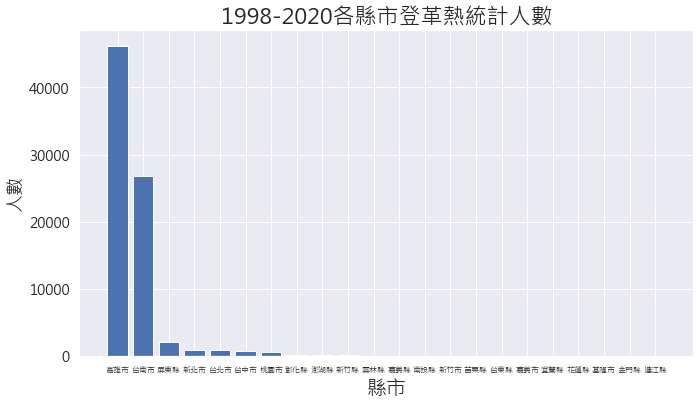

In [22]:
import seaborn as sns
sns.set()
plt.figure(figsize=(11,6))
plt.xticks(fontsize=8)
plt.yticks(fontsize=14)
plt.bar(fc.index,fc['居住縣市'])
#顯示中文字
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

#文字標籤
plt.xlabel("縣市",fontsize=20)
plt.ylabel("人數",fontsize=18)
plt.title("1998-2020各縣市登革熱統計人數",fontsize=22)

In [23]:
#先轉化為日期格式
datafm['通報日'] = pd.to_datetime( datafm['通報日'], format="%Y/%m/%d")

In [24]:
#計算每日通報的人數
time = datafm['通報日'].value_counts() 
time = pd.DataFrame(time)
print(time)

            通報日
2015-09-21  846
2015-09-22  641
2015-09-07  637
2015-09-08  637
2015-09-16  618
...         ...
2013-03-28    1
2019-03-28    1
2005-07-15    1
1998-09-08    1
2001-12-20    1

[4491 rows x 1 columns]


In [25]:
#根據日期重新排序
time = time.sort_index()
print(time)

            通報日
1998-01-07    1
1998-01-14    1
1998-01-23    1
1998-02-02    1
1998-02-04    1
...         ...
2020-10-04    1
2020-10-05    1
2020-10-07    1
2020-10-08    1
2020-10-11    1

[4491 rows x 1 columns]


Text(0.5, 1.0, '1998-2020每日通報登革熱人數')

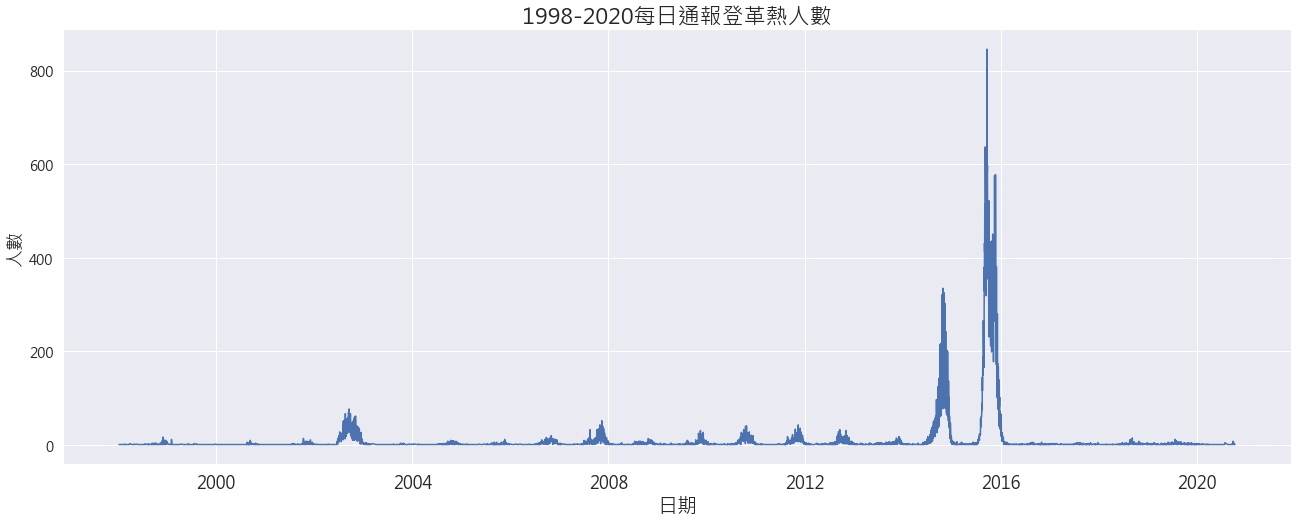

In [26]:
sns.set()
plt.figure(figsize=(22,8))
plt.xticks(fontsize=17)
plt.yticks(fontsize=14)
plt.plot(time.index,time['通報日'])
#顯示中文字
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

#文字標籤
plt.xlabel("日期",fontsize=20)
plt.ylabel("人數",fontsize=18)
plt.title("1998-2020每日通報登革熱人數",fontsize=22)

In [50]:
sex = datafm['性別'].value_counts() 
sex = pd.DataFrame(sex)
sex.drop(['None'],inplace=True)
print(sex)

      性別
女  40018
男  39929


Text(0.5, 1.0, '登革熱男女比例')

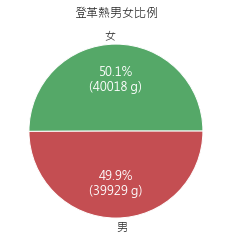

In [63]:
import numpy as np
fig, ax = plt.subplots( subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)



plt.pie(sex['性別'],labels = sex.index)
wedges, texts, autotexts = ax.pie(sex['性別'], autopct=lambda pct: func(pct,sex['性別']),
                                  textprops=dict(color="w"))


ax.set_title("登革熱男女比例")